<img src="http://cfs22.simplicdn.net/ice9/new_logo.svgz "/>

# Project 04: Movielens Dataset Analysis

You don't need to limit yourself to the number of rows/cells provided. You can add additional rows in each section to add more lines of code.

**Happy coding!**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
#Loading the rating data set from another file
rating = pd.read_csv('/home/makbul/Downloads/siplilearn/Projects/Projects for submission/ml-20m_proj_04/ratings.csv')

In [7]:
rating.shape

(20000263, 4)

In [8]:
rating.head(2)

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676


In [15]:
rating['userId'].value_counts(sort=True).head(10)

118205    9254
8405      7515
82418     5646
121535    5520
125794    5491
74142     5447
34576     5356
131904    5330
83090     5169
59477     4988
Name: userId, dtype: int64

In [3]:
#Loading the movie data set from another file
movies = pd.read_csv('/home/makbul/Downloads/siplilearn/Projects/Projects for submission/ml-20m_proj_04/movies.csv')

In [5]:
movies.shape

(27278, 3)

In [19]:
movies.head(2)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy


In [7]:
#Merging movie and ratings dataset using pandas merge, we would drop timestamp column.
merge_movie_rating = pd.merge(movies,rating,on='movieId',how='inner')

In [21]:
merge_movie_rating.head(1)

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3,4.0,944919407


In [22]:
merge_movie_rating = merge_movie_rating.drop('timestamp',axis=1)

In [23]:
merge_movie_rating.shape

(20000263, 5)

In [24]:
movieCount = merge_movie_rating.groupby('movieId').size()

In [25]:
movieswith1reviews = movieCount[movieCount==1]

In [26]:
movieswith1reviews.shape

(3972,)

In [ ]:
for mId in movieswith1reviews.index:
    merge_movie_rating = merge_movie_rating.drop(merge_movie_rating[merge_movie_rating.movieId == mId].index)

In [8]:
merge_movie_rating.shape

(20000263, 6)

In [9]:
merge_movie_rating['userId'].value_counts().tail(10)

138322    20
89146     20
92146     20
105507    20
18290     20
59390     20
23558     20
34668     20
80291     20
58028     20
Name: userId, dtype: int64

In [10]:
rating_by_user = merge_movie_rating.groupby('userId').agg([np.size, np.mean])

In [11]:
rating_by_user.head(10)

movieId              rating           timestamp              
          size         mean   size      mean      size          mean
userId                                                              
1          175  3428.537143  175.0  3.742857       175  1.107833e+09
2           61  2098.524590   61.0  4.000000        61  9.748208e+08
3          187  1698.331551  187.0  4.122995       187  9.450063e+08
4           28   394.964286   28.0  3.571429        28  8.408791e+08
5           66   574.484848   66.0  4.272727        66  8.515452e+08
6           24   461.875000   24.0  3.750000        24  8.582756e+08
7          276  2425.079710  276.0  3.289855       276  1.011207e+09
8           70   339.385714   70.0  3.800000        70  8.340797e+08
9           35  3185.742857   35.0  3.057143        35  9.940200e+08
10          38  1470.973684   38.0  3.894737        38  9.434975e+08

In [12]:
rating_by_user = rating_by_user.drop('movieId',axis=1)

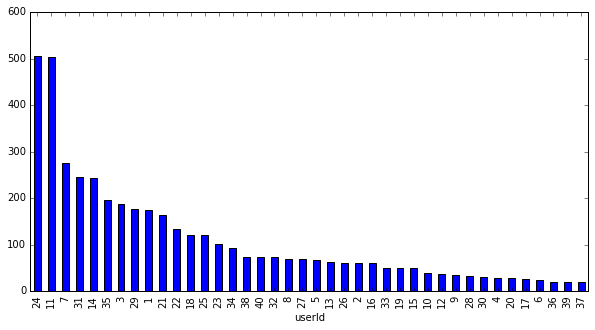

In [13]:
rating_by_user['rating']['size'].head(40).sort_values(ascending=False).plot(kind='bar',figsize=(10,5))

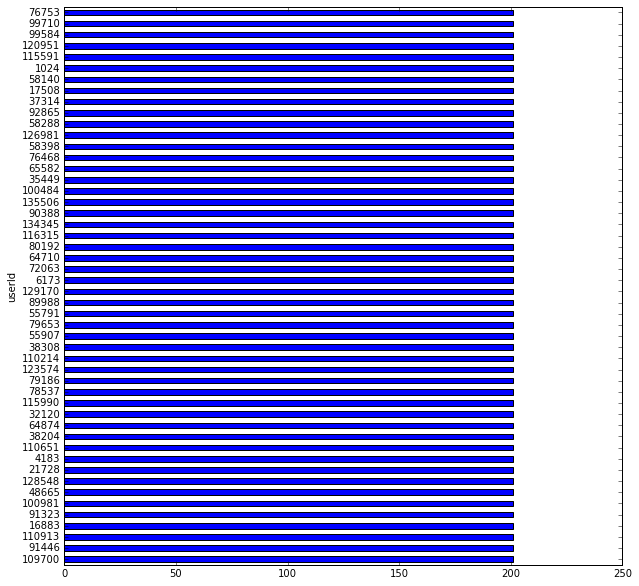

In [19]:
rating_by_user[rating_by_user['rating']['size']>200]['rating']['size'].sort_values(ascending=True)\
.head(50).plot(kind='barh',figsize=(10,10))

In [20]:
rating_by_movies = merge_movie_rating.groupby('movieId').agg([np.mean, np.size])

In [21]:
rating_by_movies.shape

(26744, 6)

In [22]:
rating_by_movies = rating_by_movies.drop('userId',axis=1)

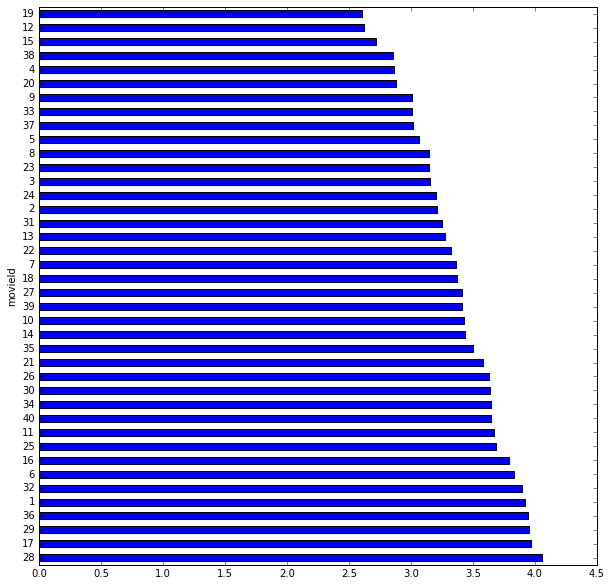

In [23]:
rating_by_movies['rating']['mean'].head(40).sort_values(ascending = False).plot(kind='barh',figsize=(10,10))

In [24]:
#movies with low rating
low_rated_movies_filter = rating_by_movies['rating']['mean']<1.5

In [25]:
low_rated_movies = rating_by_movies[low_rated_movies_filter]

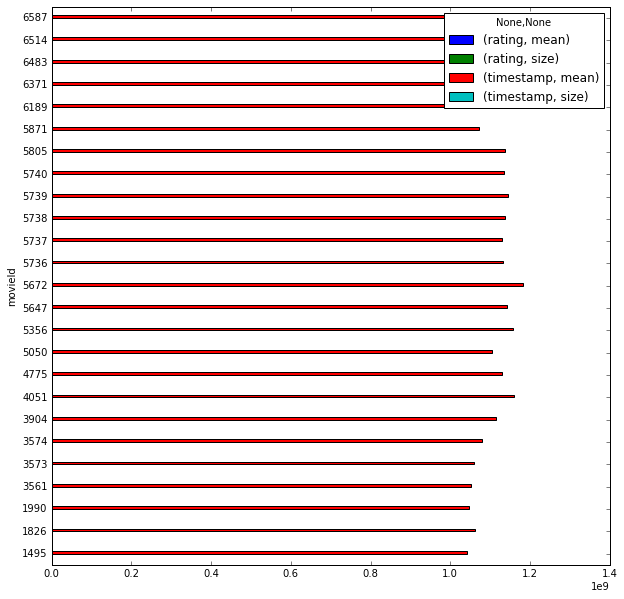

In [26]:
low_rated_movies.head(25).plot(kind='barh',figsize=(10,10))

In [27]:
low_rated_movies.head(25)

rating            timestamp     
             mean   size          mean size
movieId                                    
1495     1.390210  715.0  1.042998e+09  715
1826     1.163484  419.0  1.061068e+09  419
1990     1.430921  152.0  1.047948e+09  152
3561     1.000000    1.0  1.051371e+09    1
3573     1.452096  167.0  1.058482e+09  167
3574     1.237410  139.0  1.078366e+09  139
3904     1.375000    8.0  1.115484e+09    8
4051     1.476923   65.0  1.160767e+09   65
4775     1.124088  685.0  1.130161e+09  685
5050     1.235294   17.0  1.105108e+09   17
5356     1.478873   71.0  1.157065e+09   71
5647     1.401345  223.0  1.143496e+09  223
5672     1.316737  472.0  1.182615e+09  472
5736     1.453368  193.0  1.132509e+09  193
5737     1.377095  179.0  1.130500e+09  179
5738     1.337580  157.0  1.137638e+09  157
5739     1.261494  174.0  1.145102e+09  174
5740     1.354839  124.0  1.134899e+09  124
5805     0.500000    2.0  1.138540e+09    2
5871     1.333333    6.0  1.072350e+09    6
6189     1.000000    2.0  1.146797e+09    2
6371     1.167692  325.0  1.186486e+09  325
6483     0.973005  426.0  1.168740e+09  426
6514     1.222222    9.0  1.229910e+09    9
6587     1.164051  701.0  1.169580e+09  701